# Knock Airport Weather Analysis #

## Import libraries ##

In [164]:
# Import the libraries we will need for this assignment
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Read, write and summarise the raw data ##

In [165]:
# Load the data, skipping first 23 rows of .csv which are not rows of data for analysis.
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)

# Write the data
df.to_csv('data/df_weather_raw.csv')

# Produce initial (truncated) view of the Data Frame
df

C:\Users\fdennehy\AppData\Local\Temp\ipykernel_22208\3936050919.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248389,30-nov-2024 20:00,0,0.0,0,11.6,0,10.9,10.3,12.5,91,...,2,17,2,200,,,0.0,,0,8
248390,30-nov-2024 21:00,0,0.0,0,11.4,0,10.7,10.0,12.3,91,...,2,16,2,200,,,0.0,,0,8
248391,30-nov-2024 22:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,...,2,15,2,210,,,0.0,,0,8
248392,30-nov-2024 23:00,0,0.0,0,10.8,0,10.3,9.9,12.1,94,...,2,14,2,190,,,0.0,,0,8


In [166]:
# Provide general summary of Data Frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    248394 non-null  object 
 1   ind     248394 non-null  int64  
 2   rain    248394 non-null  object 
 3   ind.1   248394 non-null  int64  
 4   temp    248394 non-null  float64
 5   ind.2   248394 non-null  int64  
 6   wetb    248394 non-null  float64
 7   dewpt   248394 non-null  float64
 8   vappr   248394 non-null  float64
 9   rhum    248394 non-null  int64  
 10  msl     248394 non-null  object 
 11  ind.3   248394 non-null  int64  
 12  wdsp    248394 non-null  object 
 13  ind.4   248394 non-null  int64  
 14  wddir   248394 non-null  object 
 15  ww      248394 non-null  object 
 16  w       248394 non-null  object 
 17  sun     248394 non-null  float64
 18  vis     248394 non-null  object 
 19  clht    248394 non-null  object 
 20  clamt   248394 non-null  object 
dtypes: float64

Initial Observations:

1. The warning below is thrown, inidcating some columns have mixed types of data. These columns have been read in as objects instead of integers or floats.\
`DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.`\
Dtypes cannot be specified on read in, because there are a lot of ' ' strings in the data.

2. Some months have less data points than others (April 1996, July 1996, December 2024)

## Data Cleaning ##

In [167]:
# Replace ' ' strings with NaN
df = df.replace(' ',np.nan)

# Check which columns have NaNs (previously ' ')
df.isna().any()

date     False
ind      False
rain      True
ind.1    False
temp     False
ind.2    False
wetb     False
dewpt    False
vappr    False
rhum     False
msl       True
ind.3    False
wdsp      True
ind.4    False
wddir     True
ww        True
w         True
sun      False
vis       True
clht      True
clamt     True
dtype: bool

Set date as Dtype datetime and re-index the DataFrame on date.

In [168]:
# Convert 'Date' dtype: object to dtype: datetime using to_datetime
# Specify format to avoid "UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format."
# https://stackoverflow.com/questions/16672237/specifying-date-format-when-converting-with-pandas-to-datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

# Set 'date' as the index of DataFrame, to assist with analysis later on.
df.set_index('date', inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248394 entries, 1996-04-10 14:00:00 to 2024-12-01 00:00:00
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ind     248394 non-null  int64  
 1   rain    248345 non-null  object 
 2   ind.1   248394 non-null  int64  
 3   temp    248394 non-null  float64
 4   ind.2   248394 non-null  int64  
 5   wetb    248394 non-null  float64
 6   dewpt   248394 non-null  float64
 7   vappr   248394 non-null  float64
 8   rhum    248394 non-null  int64  
 9   msl     248376 non-null  object 
 10  ind.3   248394 non-null  int64  
 11  wdsp    248344 non-null  object 
 12  ind.4   248394 non-null  int64  
 13  wddir   248342 non-null  object 
 14  ww      192908 non-null  object 
 15  w       192907 non-null  object 
 16  sun     248394 non-null  float64
 17  vis     185813 non-null  object 
 18  clht    248376 non-null  object 
 19  clamt   248376 non-null  object 
dtypes: float64(5),

## Data Analysis ##

Identify months with incomplete data.\
A 31 day month should have 744 data points (31 * 24). A 28 day month should have 672 data points.\
Set 672 as the lower boundary.

In [169]:
# Resample data by month, counting the number of temperature values per month.
# https://stackoverflow.com/questions/38792122/how-to-group-and-count-rows-by-month-and-year-using-pandas
print((df.resample("ME")['temp'].count()))

date
1996-04-30      1
1996-05-31      0
1996-06-30      0
1996-07-31     16
1996-08-31    744
             ... 
2024-08-31    744
2024-09-30    720
2024-10-31    744
2024-11-30    720
2024-12-31      1
Freq: ME, Name: temp, Length: 345, dtype: int64


In [170]:
# Print which months do not exceed minimum threshold.
# https://note.nkmk.me/en/python-pandas-count-condition/
# # https://www.statology.org/pandas-count-values-in-column-with-condition/
print((df.resample("ME")['temp'].count()<672).values)

[ True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [171]:
# Create a clean dataframe, removing months with incomplete data
df_clean = df.loc['1996-08-01':'2024-11-30']

# Write this out to csv
df_clean.to_csv('data/df_weather_clean.csv')

# Produce initial (truncated) view of the Data Frame
df_clean

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-08-01 00:00:00,0,0.0,0,9.7,0,9.0,8.3,0.0,0,1011.4,0,0,0,0,1,81,0.0,35000,999,3
1996-08-01 01:00:00,0,0.0,0,9.1,0,8.5,7.9,10.6,92,1011.4,2,6,2,230,2,11,0.0,35000,999,4
1996-08-01 02:00:00,0,0.0,0,10.0,0,8.6,7.1,10.0,82,1011.2,2,8,2,240,2,11,0.0,35000,50,5
1996-08-01 03:00:00,0,0.0,0,10.3,0,9.3,8.3,10.9,87,1011.2,2,9,2,250,2,11,0.0,35000,44,5
1996-08-01 04:00:00,0,0.0,0,10.3,0,8.8,7.2,10.1,81,1011.1,2,8,2,240,2,11,0.0,30000,46,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30 19:00:00,0,0.7,0,12.2,0,11.8,11.4,13.5,95,1003.7,2,18,2,190,NaN,NaN,0.0,NaN,0,8
2024-11-30 20:00:00,0,0.0,0,11.6,0,10.9,10.3,12.5,91,1004.3,2,17,2,200,NaN,NaN,0.0,NaN,0,8
2024-11-30 21:00:00,0,0.0,0,11.4,0,10.7,10.0,12.3,91,1004.6,2,16,2,200,NaN,NaN,0.0,NaN,0,8


## Pre Plotting (I) Summary ##
The first part of the assignment is to plot temperature over time.

- The date column has no NaNs, is of Dtype datetime and is the index of the DataFrame.
- The temp column has no NaNs and is of Dtype float64.
- The first four months and the last month in the dataset have been identified as incomplete. These can be omitted from date ranges on the plots.

## Temperature Plotting ##

Plot:
1. The temperature
2. The mean temperature each day
3. The mean temperature for each month

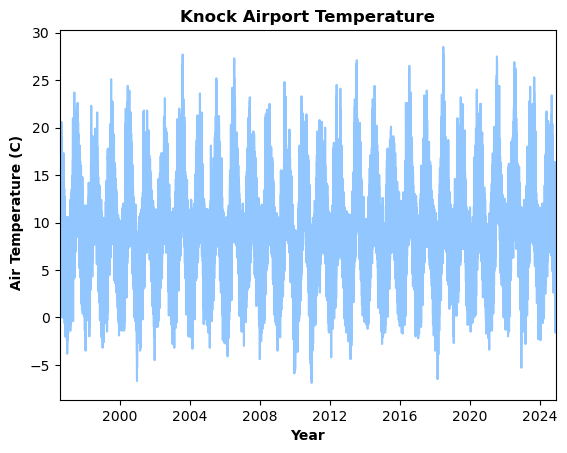

In [172]:
# Plot the Temperature

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Knock Airport Temperature', weight='bold')

# Set date format on x-axis
# https://stackoverflow.com/questions/14946371/editing-the-date-formatting-of-x-axis-tick-labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set date limits on x-axis
# https://stackoverflow.com/questions/21423158/how-do-i-change-the-range-of-the-x-axis-with-datetime
ax.set_xlim([dt.date(1996, 8, 1), dt.date(2024, 11, 30)])

# Axis labels.
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel(' Air Temperature (C)', weight ='bold')

# Generate plot
ax.plot(df['temp'])

In [173]:
# Resample data to daily and calculate the means
df['temp'].resample("d").mean()

date
1996-04-10    11.500000
1996-04-11          NaN
1996-04-12          NaN
1996-04-13          NaN
1996-04-14          NaN
                ...    
2024-11-27     2.279167
2024-11-28     4.545833
2024-11-29    11.229167
2024-11-30    11.525000
2024-12-01     0.000000
Freq: D, Name: temp, Length: 10463, dtype: float64

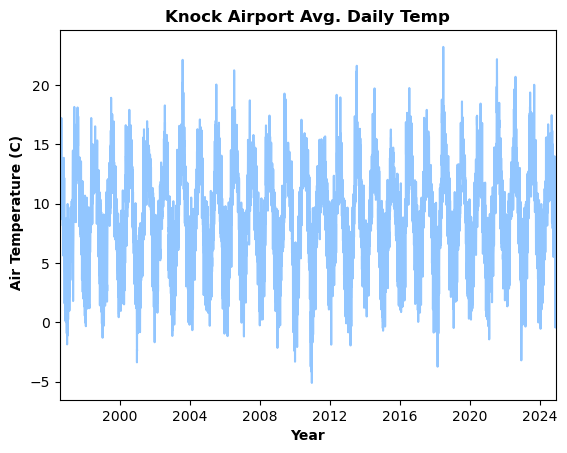

In [174]:
# Plot the mean temperature each day

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Knock Airport Avg. Daily Temp', weight='bold')

# Set date format on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set date limits on x-axis
ax.set_xlim([dt.date(1996, 8, 1), dt.date(2024, 11, 30)])

# Axis labels.
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel(' Air Temperature (C)', weight ='bold')

# Generate plot
ax.plot(df['temp'].resample("d").mean())

In [175]:
# Resample data to monthly and calculate the means.
df['temp'].resample("ME").mean()

date
1996-04-30    11.500000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31    12.650000
1996-08-31    12.946909
                ...    
2024-08-31    13.233333
2024-09-30    11.741389
2024-10-31     9.966263
2024-11-30     7.449722
2024-12-31     0.000000
Freq: ME, Name: temp, Length: 345, dtype: float64

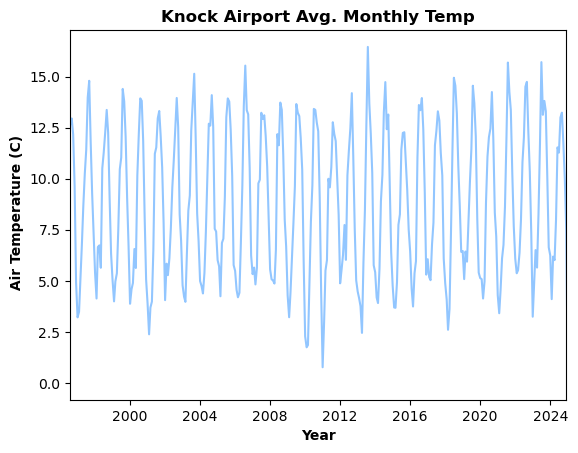

In [176]:
# Plot the mean temperature for each month

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Knock Airport Avg. Monthly Temp', weight='bold')

# Set date format on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set date limits on x-axis
ax.set_xlim([dt.date(1996, 8, 1), dt.date(2024, 11, 30)])

# Axis labels.
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel(' Air Temperature (C)', weight ='bold')

# Generate plot
ax.plot(df['temp'].resample("ME").mean())

## Windspeed Plotting ##

Plot:

1. The Windspeed
2. The rolling windspeed (say over 24 hours)
3. The max windspeed for each day
4. The monthly mean of the daily max windspeeds

In [177]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248376 entries, 1996-08-01 00:00:00 to 2024-11-30 23:00:00
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ind     248376 non-null  int64  
 1   rain    248327 non-null  object 
 2   ind.1   248376 non-null  int64  
 3   temp    248376 non-null  float64
 4   ind.2   248376 non-null  int64  
 5   wetb    248376 non-null  float64
 6   dewpt   248376 non-null  float64
 7   vappr   248376 non-null  float64
 8   rhum    248376 non-null  int64  
 9   msl     248358 non-null  object 
 10  ind.3   248376 non-null  int64  
 11  wdsp    248326 non-null  object 
 12  ind.4   248376 non-null  int64  
 13  wddir   248324 non-null  object 
 14  ww      192891 non-null  object 
 15  w       192890 non-null  object 
 16  sun     248376 non-null  float64
 17  vis     185796 non-null  object 
 18  clht    248358 non-null  object 
 19  clamt   248358 non-null  object 
dtypes: float64(5),

The wdsp column has 50 NaNs (248,376 - 248,326). Remove these and set the dtype to int.

In [178]:
# Create data series from the 'wdsp' column in the clean data frame. Drop NaNs and set the Dtype to int.
ds_wdsp = df_clean['wdsp'].dropna().astype(int)
ds_wdsp

date
1996-08-01 00:00:00     0
1996-08-01 01:00:00     6
1996-08-01 02:00:00     8
1996-08-01 03:00:00     9
1996-08-01 04:00:00     8
                       ..
2024-11-30 19:00:00    18
2024-11-30 20:00:00    17
2024-11-30 21:00:00    16
2024-11-30 22:00:00    15
2024-11-30 23:00:00    14
Name: wdsp, Length: 248326, dtype: int32

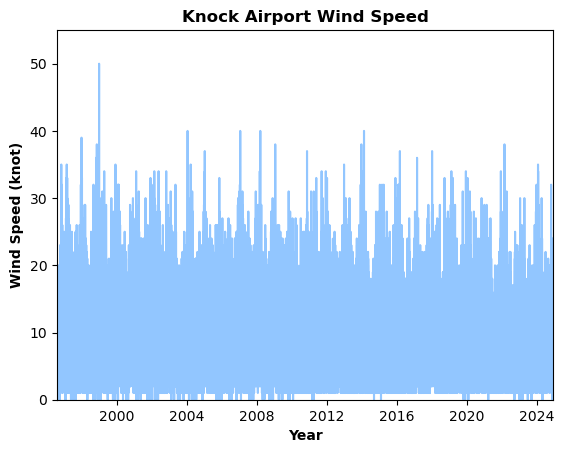

In [179]:
# Plot the windspeed

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Knock Airport Wind Speed', weight='bold')

# Set date format on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set date limits on x-axis
ax.set_xlim([dt.date(1996, 8, 1), dt.date(2024, 11, 30)])

# Set wind speed limits on y-axis
ax.set_ylim([0, 55])

# Axis labels.
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Wind Speed (knot)', weight ='bold')

# Generate plot
ax.plot(ds_wdsp)

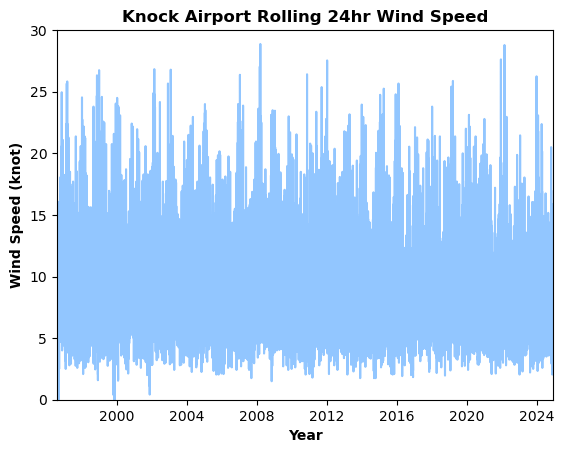

In [180]:
# Plot the rolling windspeed over 24 hours

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Knock Airport Rolling 24hr Wind Speed', weight='bold')

# Set date format on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set date limits on x-axis
ax.set_xlim([dt.date(1996, 8, 1), dt.date(2024, 11, 30)])

# Set wind speed limits on y-axis
ax.set_ylim([0, 30])

# Axis labels.
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Wind Speed (knot)', weight ='bold')

# Generate plot
ax.plot(ds_wdsp.rolling(24).mean())

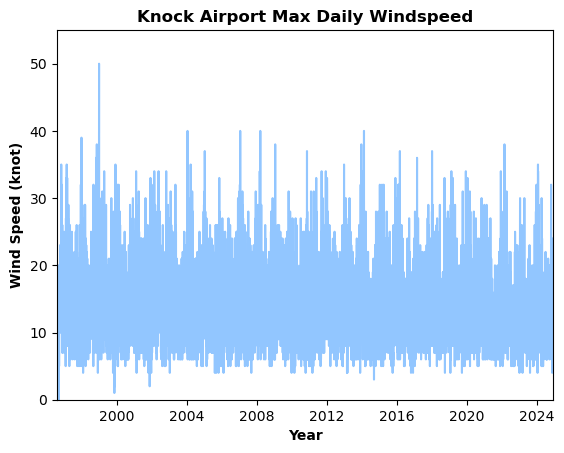

In [181]:
# Plot the max windspeed for each day

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Knock Airport Max Daily Windspeed', weight='bold')

# Set date format on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set date limits on x-axis
ax.set_xlim([dt.date(1996, 8, 1), dt.date(2024, 11, 30)])

# Set wind speed limits on y-axis
ax.set_ylim([0, 55])

# Axis labels.
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Wind Speed (knot)', weight ='bold')

# Generate plot
ax.plot(ds_wdsp.resample("d").max())

In [182]:
ds_wdsp_daily_max = ds_wdsp.resample("d").max()
ds_wdsp_daily_max

date
1996-08-01    14
1996-08-02    13
1996-08-03    10
1996-08-04    18
1996-08-05    14
              ..
2024-11-26     7
2024-11-27     6
2024-11-28    19
2024-11-29    17
2024-11-30    19
Freq: D, Name: wdsp, Length: 10349, dtype: int32

In [183]:
ds_wdsp_mm_daily_max = ds_wdsp_daily_max.resample("ME").mean()
ds_wdsp_mm_daily_max

date
1996-08-31    12.516129
1996-09-30    12.266667
1996-10-31    18.193548
1996-11-30    17.133333
1996-12-31    13.258065
                ...    
2024-07-31    11.483871
2024-08-31    14.451613
2024-09-30    12.266667
2024-10-31    13.064516
2024-11-30    11.733333
Freq: ME, Name: wdsp, Length: 340, dtype: float64

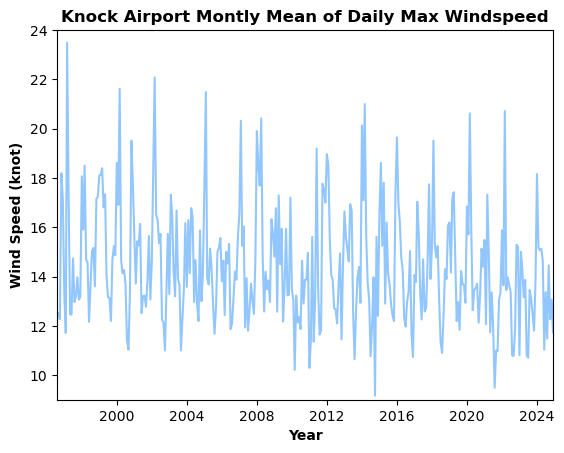

In [184]:
# Plot the monthly mean of the daily max windspeeds

plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Knock Airport Montly Mean of Daily Max Windspeed', weight='bold')

# Set date format on x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set date limits on x-axis
ax.set_xlim([dt.date(1996, 8, 1), dt.date(2024, 11, 30)])

# Set wind speed limits on y-axis
ax.set_ylim([9, 24])

# Axis labels.
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Wind Speed (knot)', weight ='bold')

# Generate plot
ax.plot(ds_wdsp_mm_daily_max)

## End ##